# Apuntes Pandas 4: Transformando los datos

Uno de los bloques de actividades principales de la libreria Pandas, es la transformacion de los datos.

Hasta ahora hemos visto diferentes comportamientos y herramientas para la gestion de datos:

- Indexacion y transformacion de ficheros para trabajarlos en Pandas
- Creacion de estructuras optimizadas de datos y como se comportan
- Realizacion de calculos y operaciones con estructuras de datos

Ahora vamos a ver otra actividad primordial, la transformacion de datos que puede conllevar:

- Cargar y combinar datos, de una o distintas fuentes
- Transformar datos para poder realizar calculos o prepararlos para su uso en modelos.

> Rara vez los datos que necesitamos para trabajar vienen ya integrados en un único dataset con toda la información que nos hace falta, o con la forma o estructura precisa para nuestros análisis.
>

## Concatenacion de datos: *pd.concat()*

Aunque hemos visto en las operaciones este modulo ya, lo correcto es recordarlo aqui ya que sirve **para concatenar datos de 2 estructuras de datos**

> Es un metodo que combina dataframes o series en una lista añadiendo las filas de cada elemento concatenado.
>

Se expresa asi:

> ***pd.concat(["nombre serie/dataframe 1", "nombre serie/dataframe 2",...], axis = " 0 para filas, 1 para columnas")***

Se caracteriza por:

- Dispone del argumento *axis =* que permite decidir **como se añadiran los datos de uno a otro*
  
> Por defecto, *axis = 0* o *axis = "index"* , **se añaden las filas al final del anterior** 
>
> Con el argumento, *axis = 1* o *axis = "columns"* , **podemos añadir columnas al final del anterior**

In [3]:
import numpy as np
import pandas as pd

data1 = pd.DataFrame({"Ej 1":np.linspace(1,10,6), "Ej 2": np.linspace(2,7, 6)})
data2 = pd.DataFrame({"Ej 1":np.linspace(3,9,6), "Ej 2": np.linspace(1,6, 6)})
pd.concat([data1,data2], axis=1)

,Ej 1,Ej 2,Ej 1,Ej 2
0,1.0,2.0,3.0,1.0
1,2.8,3.0,4.2,2.0
2,4.6,4.0,5.4,3.0
3,6.4,5.0,6.6,4.0
4,8.2,6.0,7.8,5.0
5,10.0,7.0,9.0,6.0


- Si los elementos a combinar **no tienen columnas que se llamen igual, los datos en la concatenacion en la fila seran NaN**

In [7]:
import numpy as np
import pandas as pd

data1 = pd.DataFrame({"Ej 1":np.linspace(1,10,6), "Ej 2": np.linspace(2,7, 6)})
data2 = pd.DataFrame({"Ej 1":np.linspace(3,9,6), "Ej 3": np.linspace(1,6, 6)})
pd.concat([data1,data2], axis=0)

,Ej 1,Ej 2,Ej 3
0,1.0,2.0,NaN
1,2.8,3.0,NaN
2,4.6,4.0,NaN
3,6.4,5.0,NaN
4,8.2,6.0,NaN
5,10.0,7.0,NaN
0,3.0,NaN,1.0
1,4.2,NaN,2.0
2,5.4,NaN,3.0
3,6.6,NaN,4.0


- Para evitar duplicar los indices de las filas concatenados **se puede utilizar el argumento *ignore_index=True*** para descartarlos y crear unos nuevos

In [6]:
import numpy as np
import pandas as pd

data1 = pd.DataFrame({"Ej 1":np.linspace(1,10,6), "Ej 2": np.linspace(2,7, 6)})
data2 = pd.DataFrame({"Ej 1":np.linspace(3,9,6), "Ej 3": np.linspace(1,6, 6)})
pd.concat([data1,data2], ignore_index=True)

,Ej 1,Ej 2,Ej 3
0,1.0,2.0,NaN
1,2.8,3.0,NaN
2,4.6,4.0,NaN
3,6.4,5.0,NaN
4,8.2,6.0,NaN
5,10.0,7.0,NaN
6,3.0,NaN,1.0
7,4.2,NaN,2.0
8,5.4,NaN,3.0
9,6.6,NaN,4.0


- Para evitar duplicar los indices de las columnas concatenados **es necesario añadir un nivel por cada Dataframe combinado** para ello lo expresaremos asi:

> ***pd.concat([lista de estructuras a combinar], axis = "columns", keys = ["nombre nivel columna 1", "nombre nivel columna 2",...])***

In [8]:
import numpy as np
import pandas as pd

data1 = pd.DataFrame({"Ej 1":np.linspace(1,10,6), "Ej 2": np.linspace(2,7, 6)})
data2 = pd.DataFrame({"Ej 1":np.linspace(3,9,6), "Ej 3": np.linspace(1,6, 6)})
pd.concat([data1,data2], axis = 1, keys = ["Ej 1", "Ej Extra"])

Ej 1      Ej Extra     
   Ej 1 Ej 2     Ej 1 Ej 3
0   1.0  2.0      3.0  1.0
1   2.8  3.0      4.2  2.0
2   4.6  4.0      5.4  3.0
3   6.4  5.0      6.6  4.0
4   8.2  6.0      7.8  5.0
5  10.0  7.0      9.0  6.0

Tambien se puede concatenar estrcuturas entre si con el metodo ***.append()***, el cual simplifica mucho la sintaxis si solo quieres concatenar por filas.

> Desde hace un tiempo, ***los dataframes y series ya no disponen del metodo .append(), solo esta disponible pen version anteriores a 1.4.4**

In [9]:
import numpy as np
import pandas as pd

data1 = pd.DataFrame({"Ej 1":np.linspace(1,10,6), "Ej 2": np.linspace(2,7, 6)})
data2 = pd.DataFrame({"Ej 1":np.linspace(3,9,6), "Ej 3": np.linspace(1,6, 6)})
data1.append(data2)

AttributeError: 'DataFrame' object has no attribute 'append'

In [10]:
import numpy as np
import pandas as pd

data1 = pd.Series([np.linspace(1,10,6), np.linspace(2,7, 6)])
data2 = pd.Series([np.linspace(3,9,6), np.linspace(1,6, 6)])
data1.append(data2)

AttributeError: 'Series' object has no attribute 'append'

## Combinación de datos: *pd.merge()* y *.join()*

Una vez vista la concatenacon de datos, que dispone de la limitacion de **añadir datos detras de otros datos con los que se combina** ahora veremos unos metodos que permiten realizar combinaciones de datos tabulares con mas opciones.

El metodo principal para este tipo de acciones es ***pd.merge()***

> ***pd.merge("serie/dataframe1", "serie/dataframe2,... "parametros)***
>

Tiene esta serie de caracteristicas:

*Para explicarlo vamos a utilizar datasets del material auxiliar.*

In [13]:
from pathlib import Path
import numpy as np
import pandas as pd
from pandas import Series, DataFrame

Ruta_pelis = Path(r"C:\proyecto-faust\M02_Python_Librerias_Big_Data\UX_Material_Extra_Librerias\U10_datasets\sample_movie_list.csv")
Ruta_publico = Path(r"C:\proyecto-faust\M02_Python_Librerias_Big_Data\UX_Material_Extra_Librerias\U10_datasets\sample_movie_rating.csv")
pelis = pd.read_csv(Ruta_pelis, sep = ";")
publi = pd.read_csv(Ruta_publico, sep = ";")
print(pelis.head())
print(publi.head())

                 title    year  country language  duration director_name  \
0               Snatch  2000.0       UK  English     104.0   Guy Ritchie   
1  Alice in Wonderland  2010.0      USA  English     108.0    Tim Burton   
2         District B13  2004.0   France   French      84.0  Pierre Morel   
3           Metropolis  1927.0  Germany   German     145.0    Fritz Lang   
4      The Puffy Chair  2005.0      USA  English      85.0   Jay Duplass   

        budget        gross  
0    6000000.0   30093107.0  
1  200000000.0  334185206.0  
2   12000000.0    1197786.0  
3    6000000.0      26435.0  
4      15000.0     192467.0  
                  title  imdb_score  fb_likes
0   Alice in Wonderland         6.5     24000
1       The Puffy Chair         6.6       297
2     The Damned United         7.6         0
3           Joyeux Noel         7.8     11000
4  Thor: The Dark World         7.1     63000


- Identifica automaticamente las columnas que tengan el mismo nombre y las usa **como clave para unir los datos**
> En otro caso se puede utilizar el parametro ***on = ["nombre columna"]*** para seleccionar la columna que queremos que sirva de clave para unir los datos

In [17]:
from pathlib import Path
import numpy as np
import pandas as pd
from pandas import Series, DataFrame

Ruta_pelis = Path(r"C:\proyecto-faust\M02_Python_Librerias_Big_Data\UX_Material_Extra_Librerias\U10_datasets\sample_movie_list.csv")
Ruta_publico = Path(r"C:\proyecto-faust\M02_Python_Librerias_Big_Data\UX_Material_Extra_Librerias\U10_datasets\sample_movie_rating.csv")
pelis = pd.read_csv(Ruta_pelis, sep = ";")
publi = pd.read_csv(Ruta_publico, sep = ";")
combi = pd.merge(pelis,publi)
print(combi.head())

                  title    year country language  duration     director_name  \
0   Alice in Wonderland  2010.0     USA  English     108.0        Tim Burton   
1       The Puffy Chair  2005.0     USA  English      85.0       Jay Duplass   
2     The Damned United  2009.0      UK  English      98.0        Tom Hooper   
3           Joyeux Noel  2005.0  France   French     116.0  Christian Carion   
4  Thor: The Dark World  2013.0     USA  English     112.0       Alan Taylor   

        budget        gross  imdb_score  fb_likes  
0  200000000.0  334185206.0         6.5     24000  
1      15000.0     192467.0         6.6       297  
2   10000000.0     449558.0         7.6         0  
3   22000000.0    1050445.0         7.8     11000  
4  170000000.0  206360018.0         7.1     63000  


- Por defecto, **solo combina las filas cuya clave aparece en los ambos archivos**, para poder incluir estas filas que no son comunes se utilizar el parametro ***how = ""*** con alguno de los siguientes terminos, segun lo que nos interese.

  > **Para aquellas filas que no sean combinables, apareceran valores NaN**

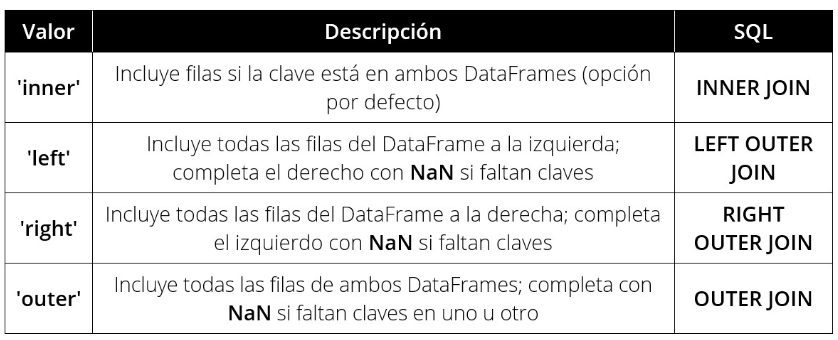

In [18]:
from pathlib import Path
import numpy as np
import pandas as pd
from pandas import Series, DataFrame

Ruta_pelis = Path(r"C:\proyecto-faust\M02_Python_Librerias_Big_Data\UX_Material_Extra_Librerias\U10_datasets\sample_movie_list.csv")
Ruta_publico = Path(r"C:\proyecto-faust\M02_Python_Librerias_Big_Data\UX_Material_Extra_Librerias\U10_datasets\sample_movie_rating.csv")
pelis = pd.read_csv(Ruta_pelis, sep = ";")
publi = pd.read_csv(Ruta_publico, sep = ";")
combi = pd.merge(pelis,publi, how="outer")
print(combi.head())

                 title    year      country language  duration  \
0  Alice in Wonderland  2010.0          USA  English     108.0   
1        Casino Royale  2006.0           UK  English     144.0   
2               Cavite  2005.0  Philippines  English      80.0   
3         District B13  2004.0       France   French      84.0   
4            I Am Love  2009.0        Italy  Italian     120.0   

      director_name       budget        gross  imdb_score  fb_likes  
0        Tim Burton  200000000.0  334185206.0         6.5   24000.0  
1   Martin Campbell  150000000.0  167007184.0         8.0       0.0  
2  Neill Dela Llana       7000.0      70071.0         6.3      74.0  
3      Pierre Morel   12000000.0    1197786.0         NaN       NaN  
4   Luca Guadagnino   10000000.0    5004648.0         7.0       0.0  


- Cuando los nombres de las columnas no coincidan, pero signifiquen lo mismo, hacemos uso de los parametros ***left_on = "nombre columna"*** para referirnos al primer dataframe/serie y ***right_on = "nombre columna"*** para referirnos al segundo dataframe/serie.

> ***pd.merge("serie/dataframe1", "serie/dataframe2, left_on = "nombre columna dataframe 1", right_on = "nombre columna dataframe 2")***
>
> > En este caso **combina ambos dataframes y sus columnas, haciendo que sean redundantes**, por lo que hay que usar ***.drop()*** para descartar una de las columnas redundantes
> >
> >>***.drop("nombre columna a eliminar", axis ="columns")***

In [23]:
from pathlib import Path
import numpy as np
import pandas as pd
from pandas import Series, DataFrame

Ruta_pelis = Path(r"C:\proyecto-faust\M02_Python_Librerias_Big_Data\UX_Material_Extra_Librerias\U10_datasets\sample_movie_list.csv")
Ruta_gene = Path(r"C:\proyecto-faust\M02_Python_Librerias_Big_Data\UX_Material_Extra_Librerias\U10_datasets\sample_movie_genres.csv")
pelis = pd.read_csv(Ruta_pelis, sep = ";")
gene = pd.read_csv(Ruta_gene, sep = ";")
combi = pd.merge(pelis,gene, left_on = "title", right_on = "movie_title").drop("movie_title", axis ="columns")
print(combi.head())

                 title    year country language  duration director_name  \
0               Snatch  2000.0      UK  English     104.0   Guy Ritchie   
1               Snatch  2000.0      UK  English     104.0   Guy Ritchie   
2  Alice in Wonderland  2010.0     USA  English     108.0    Tim Burton   
3  Alice in Wonderland  2010.0     USA  English     108.0    Tim Burton   
4  Alice in Wonderland  2010.0     USA  English     108.0    Tim Burton   

        budget        gross      genre  
0    6000000.0   30093107.0     Comedy  
1    6000000.0   30093107.0      Crime  
2  200000000.0  334185206.0  Adventure  
3  200000000.0  334185206.0     Family  
4  200000000.0  334185206.0    Fantasy  


- Podemos combinar los dataframes **a traves del indice de sus filas** si estos estan definidos. Se puede realizar de 2 maneras:

La 1º definiendo indices comunes y luego en la combinacion hacer que sea el indice.

> Se puede realizar si **definimos el indice comun usando la columna que tienen comunes**
>
> > Para ello primero realizamos la expresion ***"dataframe".set_index("nombre columna", inplace=True)*** para cada dataframe.
> 
> Una vez con un indice comun, utilizamos ***.merge()*** con los parametros ***left_index=True, right_index=True*** para asentar el indice en la combinacion.

In [24]:
from pathlib import Path
import numpy as np
import pandas as pd
from pandas import Series, DataFrame

Ruta_pelis = Path(r"C:\proyecto-faust\M02_Python_Librerias_Big_Data\UX_Material_Extra_Librerias\U10_datasets\sample_movie_list.csv")
Ruta_gene = Path(r"C:\proyecto-faust\M02_Python_Librerias_Big_Data\UX_Material_Extra_Librerias\U10_datasets\sample_movie_genres.csv")
pelis = pd.read_csv(Ruta_pelis, sep = ";")
gene = pd.read_csv(Ruta_gene, sep = ";")
pelis.set_index("title", inplace=True)
gene.set_index("movie_title", inplace=True)
combi = pd.merge(pelis,gene, left_index = True, right_index = True)
print(combi.head())

                       year country language  duration director_name  \
title                                                                  
Snatch               2000.0      UK  English     104.0   Guy Ritchie   
Snatch               2000.0      UK  English     104.0   Guy Ritchie   
Alice in Wonderland  2010.0     USA  English     108.0    Tim Burton   
Alice in Wonderland  2010.0     USA  English     108.0    Tim Burton   
Alice in Wonderland  2010.0     USA  English     108.0    Tim Burton   

                          budget        gross      genre  
title                                                     
Snatch                 6000000.0   30093107.0     Comedy  
Snatch                 6000000.0   30093107.0      Crime  
Alice in Wonderland  200000000.0  334185206.0  Adventure  
Alice in Wonderland  200000000.0  334185206.0     Family  
Alice in Wonderland  200000000.0  334185206.0    Fantasy  


la 2º opcion es realizando el uso de ***.join()*** que combina dataframes **a traves de sus indices comunes, eliminando las redundancias**

> ***"nombre dataframe 1".join("nombre dataframe 2")***
>
> > Es tan común tener que hacer este tipo de combinacion por indice, que pandas incopora este metodo para facilitar el proceso.

In [25]:
from pathlib import Path
import numpy as np
import pandas as pd
from pandas import Series, DataFrame

Ruta_pelis = Path(r"C:\proyecto-faust\M02_Python_Librerias_Big_Data\UX_Material_Extra_Librerias\U10_datasets\sample_movie_list.csv")
Ruta_gene = Path(r"C:\proyecto-faust\M02_Python_Librerias_Big_Data\UX_Material_Extra_Librerias\U10_datasets\sample_movie_genres.csv")
pelis = pd.read_csv(Ruta_pelis, sep = ";")
gene = pd.read_csv(Ruta_gene, sep = ";")
combi = pelis.join(gene)
print(combi.head())

                 title    year  country language  duration director_name  \
0               Snatch  2000.0       UK  English     104.0   Guy Ritchie   
1  Alice in Wonderland  2010.0      USA  English     108.0    Tim Burton   
2         District B13  2004.0   France   French      84.0  Pierre Morel   
3           Metropolis  1927.0  Germany   German     145.0    Fritz Lang   
4      The Puffy Chair  2005.0      USA  English      85.0   Jay Duplass   

        budget        gross          movie_title      genre  
0    6000000.0   30093107.0  Alice in Wonderland  Adventure  
1  200000000.0  334185206.0  Alice in Wonderland     Family  
2   12000000.0    1197786.0  Alice in Wonderland    Fantasy  
3    6000000.0      26435.0        Casino Royale     Action  
4      15000.0     192467.0        Casino Royale  Adventure  


## Ordenación de datos: *sort_values() y sort_index()*

Una vez vistas las diferentes formas de combinar y juntar datos de diferentes origenes, otro de los aspectos que nos puede interesar es **ordenar estos datos**

Existen 2 metodos principalmente:

- ***sort_values()***: Ordena los valores de menor a mayor (por defecto) de una **columna determinada**
> Cuando se trata de series, no es necesario incluir nada mas, ya que solo tienen 1 columna
>
> Cuando se trata de dataframes, **hay que indicar el nombre de la columna como parametro**
- ***sort_index()***:Ordena los valores de menor a mayor (por defecto) de una **fila determinada**

In [28]:
from pathlib import Path
import numpy as np
import pandas as pd
from pandas import Series, DataFrame

Ruta_pelis = Path(r"C:\proyecto-faust\M02_Python_Librerias_Big_Data\UX_Material_Extra_Librerias\U10_datasets\sample_movie_list.csv")
Ruta_publico = Path(r"C:\proyecto-faust\M02_Python_Librerias_Big_Data\UX_Material_Extra_Librerias\U10_datasets\sample_movie_rating.csv")
pelis = pd.read_csv(Ruta_pelis, sep = ";")
publi = pd.read_csv(Ruta_publico, sep = ";")
combi = pd.merge(pelis,publi)
print(combi.sort_values("duration"))

                   title    year      country language  duration  \
10                Cavite  2005.0  Philippines  English      80.0   
1        The Puffy Chair  2005.0          USA  English      85.0   
9          Jack and Jill  2011.0          USA  English      91.0   
5       The Pink Panther  2006.0          USA  English      93.0   
2      The Damned United  2009.0           UK  English      98.0   
11              Semi-Pro  2008.0          USA  English      99.0   
0    Alice in Wonderland  2010.0          USA  English     108.0   
4   Thor: The Dark World  2013.0          USA  English     112.0   
3            Joyeux Noel  2005.0       France   French     116.0   
7              I Am Love  2009.0        Italy  Italian     120.0   
6          Casino Royale  2006.0           UK  English     144.0   
8              King Kong  2005.0  New Zealand  English     201.0   

       director_name       budget        gross  imdb_score  fb_likes  
10  Neill Dela Llana       7000.0      70071

In [29]:
from pathlib import Path
import numpy as np
import pandas as pd
from pandas import Series, DataFrame

Ruta_pelis = Path(r"C:\proyecto-faust\M02_Python_Librerias_Big_Data\UX_Material_Extra_Librerias\U10_datasets\sample_movie_list.csv")
Ruta_publico = Path(r"C:\proyecto-faust\M02_Python_Librerias_Big_Data\UX_Material_Extra_Librerias\U10_datasets\sample_movie_rating.csv")
pelis = pd.read_csv(Ruta_pelis, sep = ";")
publi = pd.read_csv(Ruta_publico, sep = ";")
combi = pd.merge(pelis,publi)
combi.set_index("title", inplace=True)
print(combi.sort_index())

                        year      country language  duration  \
title                                                          
Alice in Wonderland   2010.0          USA  English     108.0   
Casino Royale         2006.0           UK  English     144.0   
Cavite                2005.0  Philippines  English      80.0   
I Am Love             2009.0        Italy  Italian     120.0   
Jack and Jill         2011.0          USA  English      91.0   
Joyeux Noel           2005.0       France   French     116.0   
King Kong             2005.0  New Zealand  English     201.0   
Semi-Pro              2008.0          USA  English      99.0   
The Damned United     2009.0           UK  English      98.0   
The Pink Panther      2006.0          USA  English      93.0   
The Puffy Chair       2005.0          USA  English      85.0   
Thor: The Dark World  2013.0          USA  English     112.0   

                         director_name       budget        gross  imdb_score  \
title                  

## Comprobar y eliminar datos duplicados: *.drop_duplicates()*

Otro aspecto a tener en cuenta que tendremos que manejar al tratar con datos es la **gestion de datos duplicados**

Para ello pandas dispone del metodo ***.duplicated()***, que nos permite averiguar **que filas estan duplicadas entre si** devolviendo valores *booleanos*. Una vez que sabemos que datos son duplicados, combinamos ese metodo con ***.drop()***

La expresion resultante sera:

> ***"nombre dataframe".drop_duplicates(["nombre columna donde queramos eliminar duplicados"], inplace=True)***

Adicionalmente, en pandas, **existen metodos especiales para utilizar con *datos booleanos*** estos son ***.any()*** y ***.all()***
> ***.any()***: Devuelve un valor True si algun valor del conjunto es True
> 
> ***.all()***: Devuelve un valor True si todos los valores del conjunto son True





In [41]:
from pathlib import Path
import numpy as np
import pandas as pd
from pandas import Series, DataFrame

Ruta_pelis = Path(r"C:\proyecto-faust\M02_Python_Librerias_Big_Data\UX_Material_Extra_Librerias\U10_datasets\sample_movie_list.csv")
Ruta_gene = Path(r"C:\proyecto-faust\M02_Python_Librerias_Big_Data\UX_Material_Extra_Librerias\U10_datasets\sample_movie_genres.csv")
pelis = pd.read_csv(Ruta_pelis, sep = ";")
gene = pd.read_csv(Ruta_gene, sep = ";")
combi = pd.merge(pelis,gene, left_on = "title", right_on = "movie_title").drop("movie_title", axis ="columns")
print(f"¿hay duplicados entre mis filas? si la respuesta es Si, sera True y sino False.",
      f"\nResultado:{combi.duplicated(["title"]).any()}")
combi.drop_duplicates(["title"], inplace=True)
print("\n" + 40*"-"+"\n")
print(combi)

¿hay duplicados entre mis filas? si la respuesta es Si, sera True y sino False. 
Resultado:True

----------------------------------------

                                    title    year      country language  \
0                                  Snatch  2000.0           UK  English   
2                     Alice in Wonderland  2010.0          USA  English   
5                            District B13  2004.0       France   French   
8                              Metropolis  1927.0      Germany   German   
10                        The Puffy Chair  2005.0          USA  English   
13  The League of Extraordinary Gentlemen  2003.0          USA  English   
17                      The Damned United  2009.0           UK  English   
20                               Joe Dirt  2001.0          USA  English   
23                            Joyeux Noel  2005.0       France   French   
28                                Mr 3000  2004.0          USA  English   
32                   Thor: The Dark 

## Aplicar funciones a datos: *.apply()*

Con los datos que trabajamos, puede ser neecsario que le apliquemos alguna funcion personalizada para realizar calculos (una funcion *lambda* por ejemplo) para poder realizarlo sera necesario utilizar el metodo ***.apply()***

> ***"nombre dataframe".apply("funcion personalizada", "parametros que ayuden a aplicarlo")***

In [45]:
from pathlib import Path
import numpy as np
import pandas as pd
from pandas import Series, DataFrame

Ruta_pelis = Path(r"C:\proyecto-faust\M02_Python_Librerias_Big_Data\UX_Material_Extra_Librerias\U10_datasets\sample_movie_list.csv")
Ruta_gene = Path(r"C:\proyecto-faust\M02_Python_Librerias_Big_Data\UX_Material_Extra_Librerias\U10_datasets\sample_movie_genres.csv")
pelis = pd.read_csv(Ruta_pelis, sep = ";")
gene = pd.read_csv(Ruta_gene, sep = ";")
combi = pd.merge(pelis,gene, left_on = "title", right_on = "movie_title").drop("movie_title", axis ="columns")
combi.apply(lambda x: x.budget - x.gross, axis = 1).head()

0    -24093107.0
1    -24093107.0
2   -134185206.0
3   -134185206.0
4   -134185206.0
dtype: float64

## Discretizar o Agrupacion en rango de valores: *pd.cut()*

Otra funcion transformadora es la conversion de datos a **agrupacion de datos** que no es lo mismo que agrupar datos en funcion de sus valores.

La diferencia es que los valores de los datos, **son cambiados a rangos de datos en base a los valores originales**

Para ello utilizamos el metodo ***pd.cut()*** con una serie de parametros.

> ***pd.cut("nombre dataframe"["columna en la que se transformaran los datos"], bins = [lista de valores por los que se realizaran los rangos, np.inf])***
>

Hay que tener en cuenta 2 cosas:

- Funciona con datos que son **int64** o **float64** no con **str**
- El resultado genera unas etiquetas que se pueden cambiar con el parametro ***labels = [lista de nombres de los rangos]***
  > La lista de las etiquetas a cambiar tiene que ser con el mismo numero de rangos que se van a generar

In [57]:
from pathlib import Path
import numpy as np
import pandas as pd
from pandas import Series, DataFrame

Ruta_pelis = Path(r"C:\proyecto-faust\M02_Python_Librerias_Big_Data\UX_Material_Extra_Librerias\U10_datasets\sample_movie_list.csv")
Ruta_gene = Path(r"C:\proyecto-faust\M02_Python_Librerias_Big_Data\UX_Material_Extra_Librerias\U10_datasets\sample_movie_genres.csv")
pelis = pd.read_csv(Ruta_pelis, sep = ";")
gene = pd.read_csv(Ruta_gene, sep = ";")
combi = pd.merge(pelis,gene, left_on = "title", right_on = "movie_title").drop("movie_title", axis ="columns")
combi_guay = pd.cut(combi["duration"], bins=[90,100,120,140,np.inf], labels=["Corta","Larguilla","Larga","Larguisima"])
print(combi_guay)

0     Larguilla
1     Larguilla
2     Larguilla
3     Larguilla
4     Larguilla
        ...    
58        Corta
59        Corta
60        Corta
61        Corta
62        Corta
Name: duration, Length: 63, dtype: category
Categories (4, object): ['Corta' < 'Larguilla' < 'Larga' < 'Larguisima']


Por ultimo, es común al realizar esta transformacion utilizar el metodo ***pd.value_counts()*** para contabilizar cuantos rangos coinciden entre tus filas.

> ***pd.value_counts("nombre dataframe")***
>

In [56]:
from pathlib import Path
import numpy as np
import pandas as pd
from pandas import Series, DataFrame

Ruta_pelis = Path(r"C:\proyecto-faust\M02_Python_Librerias_Big_Data\UX_Material_Extra_Librerias\U10_datasets\sample_movie_list.csv")
Ruta_gene = Path(r"C:\proyecto-faust\M02_Python_Librerias_Big_Data\UX_Material_Extra_Librerias\U10_datasets\sample_movie_genres.csv")
pelis = pd.read_csv(Ruta_pelis, sep = ";")
gene = pd.read_csv(Ruta_gene, sep = ";")
combi = pd.merge(pelis,gene, left_on = "title", right_on = "movie_title").drop("movie_title", axis ="columns")
combi_guay = pd.cut(combi["duration"], bins=[90,100,120,140,np.inf], labels=["Corta","Larguilla","Larga","Larguisima"])
print(pd.value_counts(combi_guay))

duration
Larguilla     23
Corta         20
Larguisima     9
Larga          4
Name: count, dtype: int64


C:\Users\insau\AppData\Local\Temp\ipykernel_20572\1854532999.py:12: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  print(pd.value_counts(combi_guay))


> **TIP:** Aparece un mensaje indicando que este metodo **sera removido por ineficiente**, en su lugar recomiendan lo siguiente:
> 
> >  ***pd.Series(obj).value_counts()***

In [55]:
from pathlib import Path
import numpy as np
import pandas as pd
from pandas import Series, DataFrame

Ruta_pelis = Path(r"C:\proyecto-faust\M02_Python_Librerias_Big_Data\UX_Material_Extra_Librerias\U10_datasets\sample_movie_list.csv")
Ruta_gene = Path(r"C:\proyecto-faust\M02_Python_Librerias_Big_Data\UX_Material_Extra_Librerias\U10_datasets\sample_movie_genres.csv")
pelis = pd.read_csv(Ruta_pelis, sep = ";")
gene = pd.read_csv(Ruta_gene, sep = ";")
combi = pd.merge(pelis,gene, left_on = "title", right_on = "movie_title").drop("movie_title", axis ="columns")
combi_guay = pd.cut(combi["duration"], bins=[90,100,120,140,np.inf], labels=["Corta","Larguilla","Larga","Larguisima"])
print(pd.Series(combi_guay).value_counts())

duration
Larguilla     23
Corta         20
Larguisima     9
Larga          4
Name: count, dtype: int64
